In [70]:
#from read_epi import data
from sklearn.decomposition import PCA
import seaborn as sns
from scipy import stats
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
# import pymc as pm
mpl.rcParams['figure.dpi']= 200

In [69]:
data = pd.read_csv("all_data_Brain_GSE50161.csv")
data = data.to_numpy()
N, D = data.shape

# Poisson Modelling

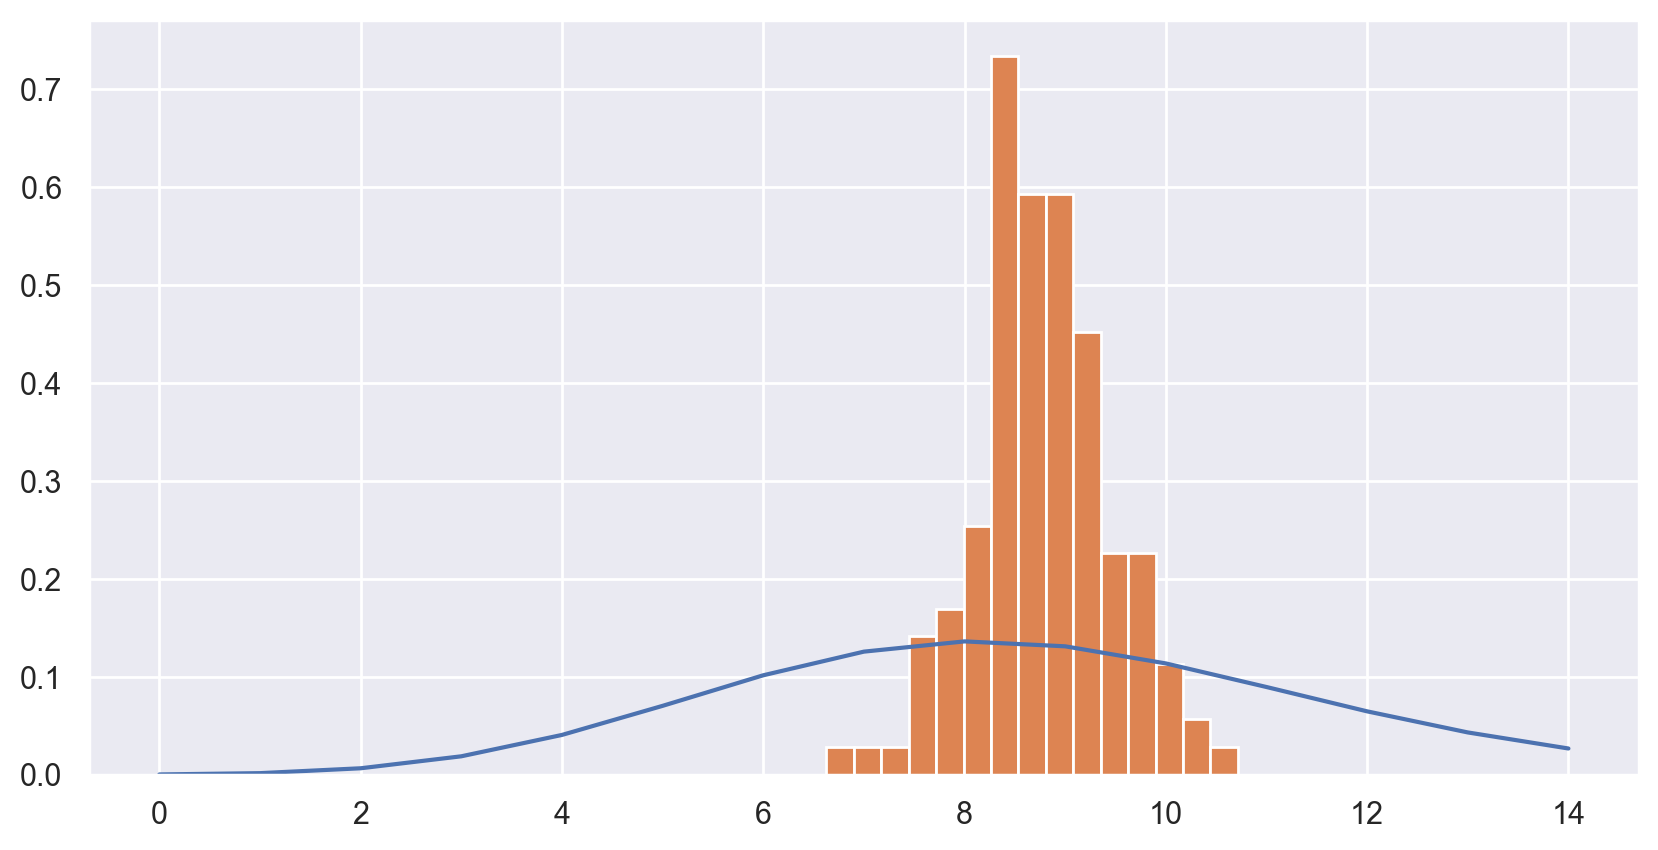

In [145]:
def get_hist_and_indices(X, i):
    # this is just binning the original, continuous gene expression data into discrete bins (use these bins so that we are consistent!)
    sample = X[:, i+2]
    hist = np.histogram(sample, bins=15, density=False)
    indices = np.digitize(np.float64(sample), np.float64(hist[1]), right=False) # don't think we need this, just in case tho
    return sample, hist 

def estimate_poisson_MLE(hist):
    # hist is count data!
    # MLE of Poisson is mean of samples, so:
    return np.mean(hist[0])

def plot_model_and_hist(sample, hist, lam):
    fig, ax = plt.subplots(1,1)
    bins = np.arange(len(hist[1]) - 1)
    poissonfit = plt.plot(bins, stats.poisson.pmf(bins, lam), label="Poisson Fit (MLE)")
    histogram =  plt.hist(sample, bins=hist[1], density=True, label="Data")

sample, hist = get_hist_and_indices(data, 1) # just replace the number for which gene number you want
mle_lam = estimate_poisson_MLE(hist)
plot_model_and_hist(sample, hist, mle_lam)

# PCA - dimensionality reduction

In [ ]:
pca = PCA(n_components=2)
pca.fit(data[:,2:])
data_pcaed = pca.transform(data[:,2:])

# first plotting the PCA space
plt.scatter(data_pcaed[:,0], data_pcaed[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Top 2 Principal Components")
#plt.savefig("pca.png")

In [ ]:
# second plotting histogram for PC1
plt.hist(data_pcaed[:,0], color="g")
plt.title("Histogram of PC1")
#plt.savefig("histogram_pc1.png")

In [ ]:
# third plotting histogram for PC2
plt.hist(data_pcaed[:,1], color="purple")
plt.title("Histogram of PC2")
#plt.savefig("histogram_pc2.png")